In [1]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#LOADING THE DATASET

project= pd.read_csv("/Users/sumaiyairshad/Desktop/MS in Data Science/CAPSTONE PROJECT/E Commerce/E-commerce Customer Segmentation Dataset.csv")
project

,Customer_ID,Customer_Name,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Product_Category,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,Preferred_Payment_Method,Preferred_Delivery_Option,Device_Used,Last_Activity,Customer_Region,Review_Score,Customer_Segment
0,1,Michelle Charles,69,0,192704,60,1,Fashion,8,78,182.40,1,0,PayPal,Standard,Tablet,33,Asia,2,0
1,2,Kaylee Medina,62,0,165578,36,1,Sports,7,25,342.85,1,1,Credit Card,Standard,Desktop,307,Europe,4,1
2,3,Ronald Hoffman,52,0,66523,46,0,Home,4,68,275.57,1,0,Debit Card,Same-Day,Tablet,131,Asia,2,0
3,4,Sandra Mcguire,56,1,193559,83,0,Sports,5,88,97.62,1,1,Net Banking,Standard,Mobile,185,North America,1,1
4,5,Andrew Mcdonald,56,0,57461,60,0,Sports,5,86,438.02,0,1,Net Banking,Same-Day,Desktop,29,South America,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,21996,Tonya Kramer,22,1,60778,25,1,Home,2,41,642.65,1,1,Credit Card,Same-Day,Mobile,27,South America,2,1
21996,21997,Melvin Valencia,38,0,129255,14,0,Home,12,23,598.19,0,1,Debit Card,Same-Day,Desktop,135,Asia,2,0
21997,21998,Shannon Mitchell,58,0,194525,81,1,Sports,8,11,204.23,1,0,Credit Card,Standard,Desktop,301,Asia,1,2
21998,21999,Allison West,23,0,28331,82,1,Home,2,59,247.71,1,0,Credit Card,Same-Day,Mobile,157,North America,5,2


In [3]:
#CONVERTING THE CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS USING ENCODING

one_hot_columns=['Product_Category','Preferred_Payment_Method','Device_Used','Customer_Region']
project=pd.get_dummies(project, columns=one_hot_columns)

In [5]:
#REMOVING IRRELEVANT FEATURES(Customer_ID and Customer_Name)

project_cleaned=project.drop(columns=['Customer_ID','Customer_Name'])

#TO MAKE SURE BOTH THE COLUMNS ARE DROPPED
project_cleaned.head()

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_PayPal,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America
0,69,0,192704,60,1,8,78,182.40,1,0,...,0,0,1,0,0,1,1,0,0,0
1,62,0,165578,36,1,7,25,342.85,1,1,...,0,0,0,1,0,0,0,1,0,0
2,52,0,66523,46,0,4,68,275.57,1,0,...,1,0,0,0,0,1,1,0,0,0
3,56,1,193559,83,0,5,88,97.62,1,1,...,0,1,0,0,1,0,0,0,1,0
4,56,0,57461,60,0,5,86,438.02,0,1,...,0,1,0,1,0,0,0,0,0,1


In [6]:
#ALSO, I'LL CONVERT PREFERRED DELIVERY OPTION INTO NUMERICAL FEATURE USING LABEL ENCODING

# Define a custom order for categories
preferred_order = {'Standard': 0, 'Same-Day': 1, 'Express': 2}  # Example categories

# Map the categories to the custom order and overwrite the original column
project_cleaned['Preferred_Delivery_Option'] = project_cleaned['Preferred_Delivery_Option'].map(preferred_order)

# Now check the data type
print(project_cleaned.dtypes)  # This will show that 'Preferred_Delivery_Option' is now int64, not object


Age                                       int64
Gender                                    int64
Annual_Income                             int64
Spending_Score                            int64
Marital_Status                            int64
Years_as_Customer                         int64
Number_of_Orders                          int64
Average_Order_Value                     float64
Loyalty_Membership                        int64
Discount_Usage                            int64
Preferred_Delivery_Option                 int64
Last_Activity                             int64
Review_Score                              int64
Customer_Segment                          int64
Product_Category_Beauty                   uint8
Product_Category_Electronics              uint8
Product_Category_Fashion                  uint8
Product_Category_Home                     uint8
Product_Category_Sports                   uint8
Preferred_Payment_Method_Credit Card      uint8
Preferred_Payment_Method_Debit Card     

In [7]:
#SEPARATING FEATURES(X) AND TARGET VARIABLE(Y)
X = project_cleaned.drop(columns=['Customer_Segment'])  
y = project_cleaned['Customer_Segment']

In [8]:
#STANDARDIZING THE DATA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#PERFORMING PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [10]:
#EXPLAINED VARIANCE RATIO
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


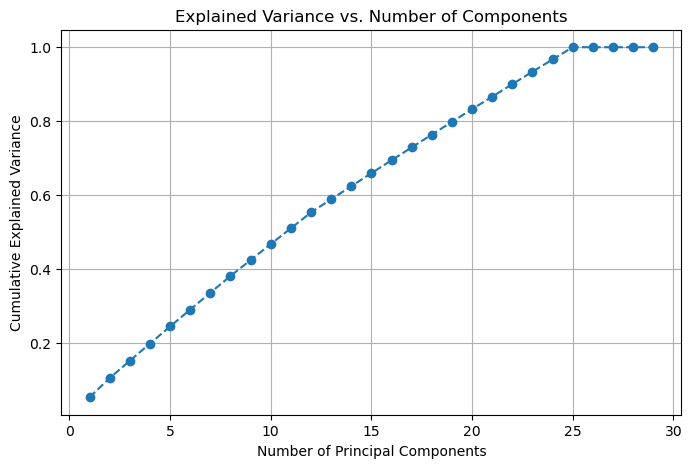

In [11]:
#PLOTTING EXPLAINED VARIANCE

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [12]:
#SELECTING NUMBER OF COMPONENTS(EG.,95% VARIANCE)

num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")

Number of components to retain 95% variance: 24


In [13]:
#REDUCE DIMENSIONALITY


pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X_scaled)

In [14]:
#INSPECT FEATURE CONTRIBUTION

print("Feature contributions to the principal components:")
for i, component in enumerate(pca.components_, 1):
    print(f"PC{i}: {component}")

Feature contributions to the principal components:
PC1: [-0.00487703  0.00927612  0.00666225 -0.0204355   0.00254698 -0.01922296
  0.00501136  0.0033816  -0.0018807  -0.0170207   0.03048022  0.00657742
  0.03069817  0.02978539  0.05607674  0.01159386 -0.11261736  0.01659349
 -0.03692809 -0.00517631  0.10027696 -0.05793881  0.79163241 -0.33049787
 -0.46138855 -0.00847429  0.1056395  -0.05892947 -0.03723344]
PC2: [ 0.01735114 -0.0038383  -0.01242914  0.00544474  0.01509836 -0.01148492
 -0.00387568  0.01891216 -0.00641165 -0.04019669 -0.00494338 -0.00247899
  0.00184251 -0.02852824  0.04496854 -0.00759246 -0.02980665  0.02144732
  0.0729318  -0.04425338  0.01602578 -0.04495651 -0.07712952  0.73071082
 -0.65381879  0.09533004 -0.07205337 -0.03778269  0.01435038]
PC3: [-0.00918206  0.01625162  0.00899627 -0.01860314  0.00549384  0.01519834
 -0.01074357 -0.01553659  0.01826111 -0.00724773 -0.01622963 -0.02026809
 -0.01867542 -0.0195433  -0.01757108 -0.0459389  -0.0435398   0.12649831
 -0.381

#MODEL BUILDING USING LOGISTIC REGRESSION



In [15]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
#SPLITTING THE DATASET INTO TRAING AND TESTING SETS

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#INITIALIZING AND TRAINING THE LOGISTIC REGRESSION MODEL

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [18]:
#MAKING PREDICTIONS ON THE TEST SET

y_pred = logistic_model.predict(X_test)

In [19]:
#EVALUATING THE MODEL

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


In [20]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.27      0.30      1467
           1       0.33      0.35      0.34      1458
           2       0.33      0.37      0.35      1475

    accuracy                           0.33      4400
   macro avg       0.33      0.33      0.33      4400
weighted avg       0.33      0.33      0.33      4400



In [21]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

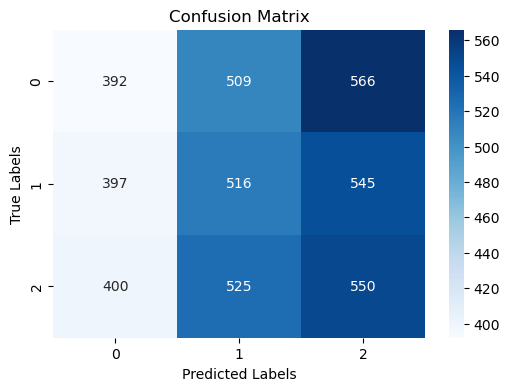

In [22]:
#VISUALIZING THE CONFUSION MATRIX
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [23]:
#CHECKING FEATURE IMPROTANCE

print("\nFeature Coefficients:")
for i, coef in enumerate(logistic_model.coef_[0], 1):
    print(f"PC{i}: {coef:.4f}")


Feature Coefficients:
PC1: 0.0042
PC2: -0.0037
PC3: 0.0001
PC4: -0.0014
PC5: -0.0048
PC6: 0.0091
PC7: 0.0047
PC8: -0.0014
PC9: -0.0031
PC10: 0.0106
PC11: 0.0021
PC12: -0.0117
PC13: -0.0220
PC14: 0.0049
PC15: -0.0193
PC16: 0.0002
PC17: -0.0050
PC18: 0.0042
PC19: -0.0000
PC20: -0.0027
PC21: -0.0089
PC22: 0.0116
PC23: -0.0045
PC24: 0.0137


-SO, THE MODEL BUILDING AFTER PCA HAS REALLY LOW ACCURACY WHICH MEANS THE DATASET AFTER PCA IS NOT APPROPRIATE FOR MODEL BUILDING.

#MODEL BUILDING USING RANDOM FOREST 


In [24]:
#IMPORTING RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

In [25]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
#INITIALIZING AND TRAINING RANDOM FOREST MODEL

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
#MAKING PREDICTIONS ON THE TEST SET

y_pred = rf_model.predict(X_test)

In [28]:
#EVALUATING THE MODEL


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33      1467
           1       0.34      0.34      0.34      1458
           2       0.35      0.34      0.35      1475

    accuracy                           0.34      4400
   macro avg       0.34      0.34      0.34      4400
weighted avg       0.34      0.34      0.34      4400



-Again the accuracy is 34% which is low.So, now I'll go back to my previous dataset and do some feature selection rather than PCA.